### Importación de datos



In [56]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda3.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Secadora de ropa,Electrodomésticos,1285100.0,66600.0,17/12/2021,Camila Rivera,Santa Marta,4,Tarjeta de crédito,4,11.24079,-74.19904
1,Mesa de noche,Muebles,290100.0,13600.0,10/02/2021,Maria Alfonso,Cali,3,Tarjeta de crédito,1,3.43722,-76.52250
2,Guitarra acústica,Instrumentos musicales,303500.0,17400.0,22/01/2023,Lucas Olivera,Bogotá,5,Tarjeta de crédito,3,4.60971,-74.08175
3,Balón de voleibol,Deportes y diversión,58800.0,3300.0,22/03/2022,Pedro Gomez,Barranquilla,4,Tarjeta de crédito,6,10.96854,-74.78132
4,Armario,Muebles,521100.0,25900.0,12/01/2022,Blanca Ramirez,Bogotá,1,Tarjeta de crédito,1,4.60971,-74.08175


#1. Análisis de facturación



In [66]:
import pandas as pd

def ingresoTotal(tiendaDf):
    return tiendaDf['Precio'].sum()

# Diccionario para almacenar resultados
resultados = {
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Ingreso Total': [int(ingresoTotal(tienda)),
                      int(ingresoTotal(tienda2)),
                      int(ingresoTotal(tienda3)),
                      int(ingresoTotal(tienda4))
                     ]
}

# Crear DataFrame de resultados
ingresos_df = pd.DataFrame(resultados)
print("Ingresos totales por tienda:")
print(ingresos_df)


Ingresos totales por tienda:
     Tienda  Ingreso Total
0  Tienda 1     1150880400
1  Tienda 2     1116343500
2  Tienda 3     1098019600
3  Tienda 4     1038375700


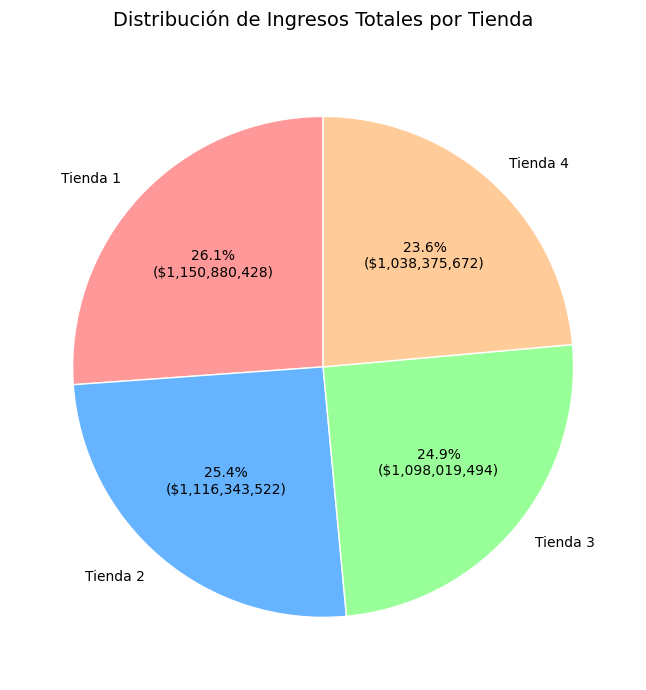

In [67]:
'''
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

barras = ax.bar(ingresos_df['Tienda'], ingresos_df['Ingreso Total'], color='dodgerblue')
ax.set_ylabel('Ingreso total ($)')
ax.set_title('Comparación de Ingresos Totales por Tienda')

for barra in barras:
    height = barra.get_height()
    ax.text(barra.get_x() + barra.get_width()/2., height,
            f'${height:,.2f}',
            ha='center', va='bottom', fontsize=8)

plt.show()
ingresosTotales = fig
'''
import matplotlib.pyplot as plt
import pandas as pd

# Calcular ingresos totales para cada tienda (suma de precios)
ingresos_tienda1 = tienda['Precio'].sum()
ingresos_tienda2 = tienda2['Precio'].sum()
ingresos_tienda3 = tienda3['Precio'].sum()
ingresos_tienda4 = tienda4['Precio'].sum()

# Crear listas para los datos
ingresos = [ingresos_tienda1, ingresos_tienda2, ingresos_tienda3, ingresos_tienda4]
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
colores = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

# Crear el pie chart
fig1 = plt.figure(figsize=(10, 7))
plt.pie(ingresos,
        labels=nombres_tiendas,
        colors=colores,
        autopct=lambda p: f'{p:.1f}%\n(${p*sum(ingresos)/100:,.0f})',
        startangle=90,
        wedgeprops={'edgecolor': 'white', 'linewidth': 1})

# Añadir título y mejorar formato
plt.title('Distribución de Ingresos Totales por Tienda', pad=20, fontsize=14)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


# 2. Ventas por categoría

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Lista de todas las tiendas
tiendas = [tienda, tienda2, tienda3, tienda4]
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

# Configurar el gráfico
plt.figure(figsize=(14, 10))

# Analizar cada tienda
for i, (df, nombre) in enumerate(zip(tiendas, nombres_tiendas), 1):
    # Calcular ventas por categoría
    ventas_por_categoria = df.groupby('Categoría del Producto')['Producto'].count().sort_values(ascending=False)

    # Mostrar resultados en consola
    print(f"\n{nombre} - Ventas por categoría:")
    print(ventas_por_categoria)


Tienda 1 - Ventas por categoría:
Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: Producto, dtype: int64

Tienda 2 - Ventas por categoría:
Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
Name: Producto, dtype: int64

Tienda 3 - Ventas por categoría:
Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Artículos para el hogar    177
Instrumentos musicales     177
Name: Producto, dtype: int6

<Figure size 1400x1000 with 0 Axes>

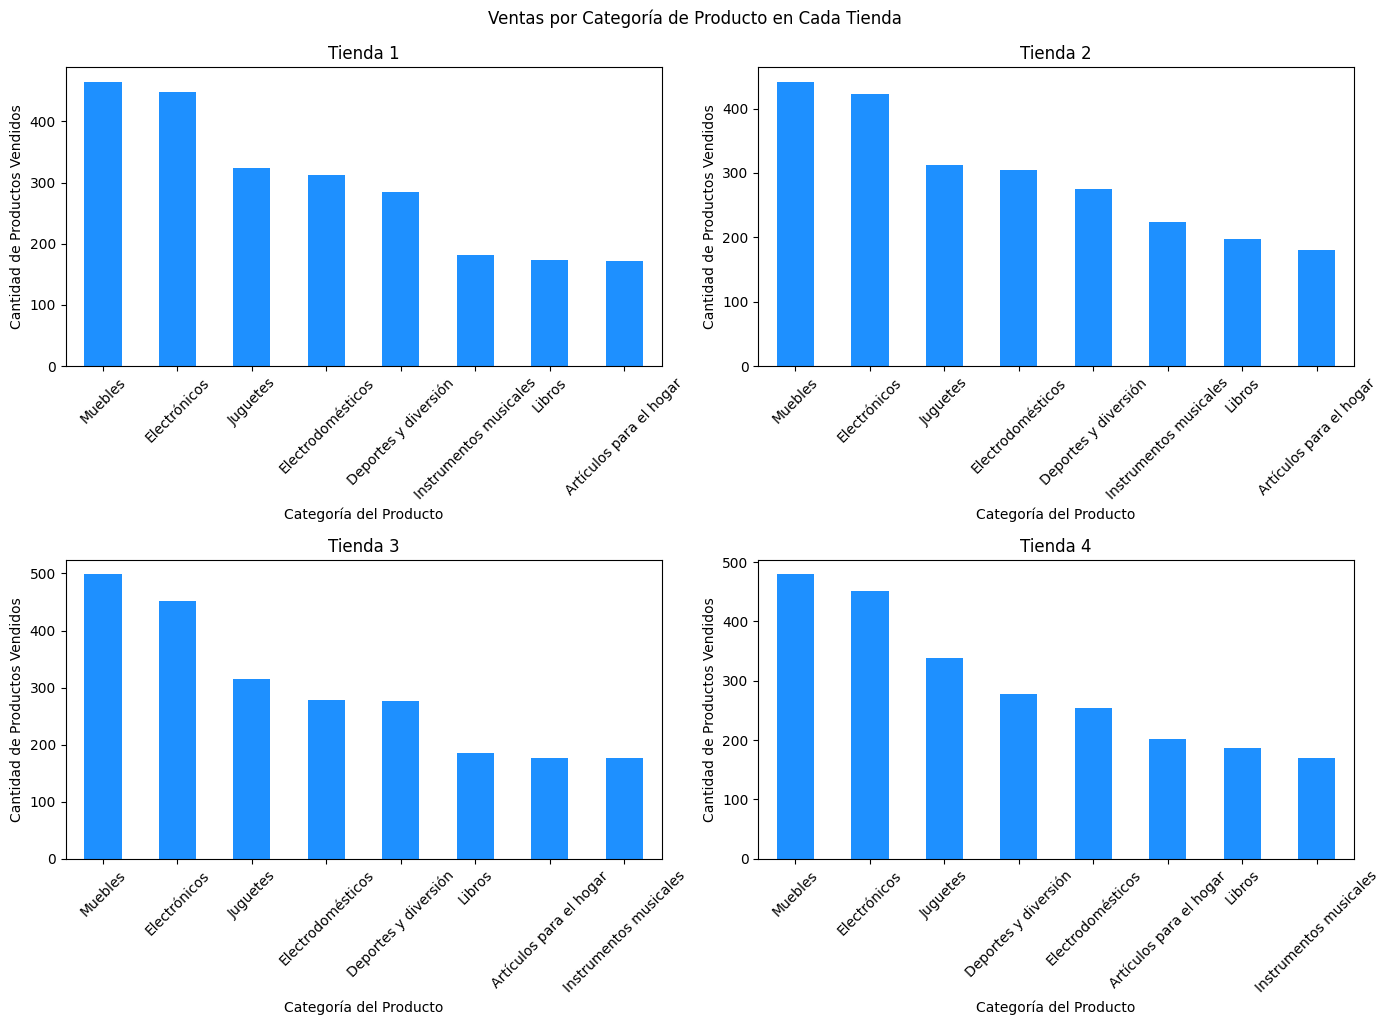

In [60]:
import matplotlib.pyplot as plt

# Configurar el gráfico
plt.figure(figsize=(14, 10))

for i, (df, nombre) in enumerate(zip(tiendas, nombres_tiendas), 1):
    # Calcular ventas por categoría
    ventas_por_categoria = df.groupby('Categoría del Producto')['Producto'].count().sort_values(ascending=False)


# Crear subgráfico para cada tienda
    plt.subplot(2, 2, i)
    ventas_por_categoria.plot(kind='bar', color='dodgerblue')
    plt.title(nombre)
    plt.xlabel('Categoría del Producto')
    plt.ylabel('Cantidad de Productos Vendidos')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.suptitle('Ventas por Categoría de Producto en Cada Tienda', y=1.02)
plt.show()


# 3. Calificación promedio de la tienda


In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# Asumimos que los DataFrames tienda, tienda2, tienda3 y tienda4 ya están cargados
tiendas = [tienda, tienda2, tienda3, tienda4]
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

# Almacenaremos los resultados aquí
resultados_calificaciones = {}

# Calcular promedio de calificaciones para cada tienda
for df, nombre in zip(tiendas, nombres_tiendas):
    if 'Calificación' in df.columns:
        promedio = df['Calificación'].mean()
        resultados_calificaciones[nombre] = promedio
        print(f"{nombre}: Calificación promedio = {promedio:.2f}")
    else:
        print(f"Advertencia: {nombre} no tiene columna 'Calificación'")


Tienda 1: Calificación promedio = 3.98
Tienda 2: Calificación promedio = 4.04
Tienda 3: Calificación promedio = 4.05
Tienda 4: Calificación promedio = 4.00


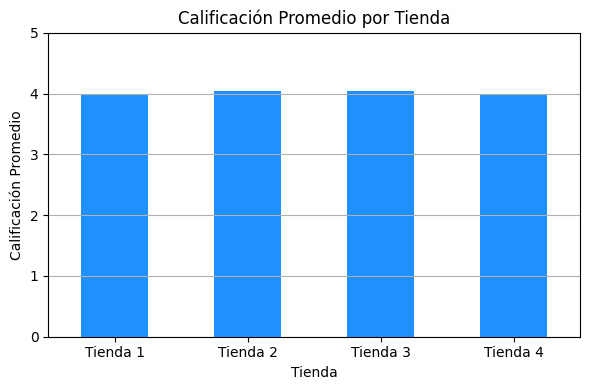

In [62]:
# Visualización de los resultados
if resultados_calificaciones:
    fig2 = plt.figure(figsize=(6, 4))
    pd.Series(resultados_calificaciones).plot(kind='bar', color='dodgerblue')
    plt.title('Calificación Promedio por Tienda')
    plt.xlabel('Tienda')
    plt.ylabel('Calificación Promedio')
    plt.ylim(0, 5)  # Asumiendo que la calificación va de 0 a 5
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='-', alpha=1.0)
    plt.tight_layout()
    plt.show()
else:
    print("No se encontraron datos de calificación en ninguna tienda")


# 4. Productos más y menos vendidos


Tienda 1:
Producto más vendido: Microondas (60 ventas)
Producto menos vendido: Celular ABXY (33 ventas)

Tienda 2:
Producto más vendido: Iniciando en programación (65 ventas)
Producto menos vendido: Juego de mesa (32 ventas)

Tienda 3:
Producto más vendido: Kit de bancas (57 ventas)
Producto menos vendido: Bloques de construcción (35 ventas)

Tienda 4:
Producto más vendido: Cama box (62 ventas)
Producto menos vendido: Guitarra eléctrica (33 ventas)


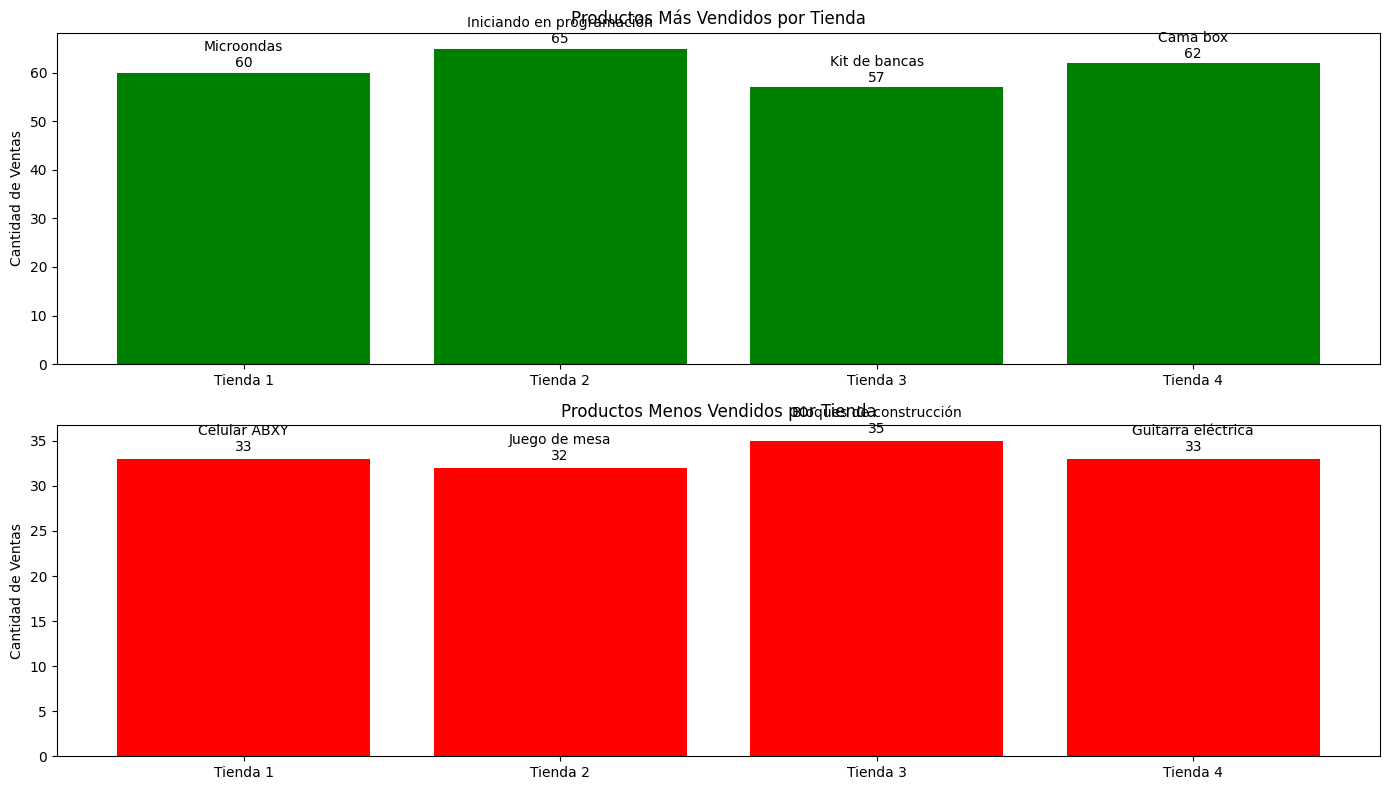

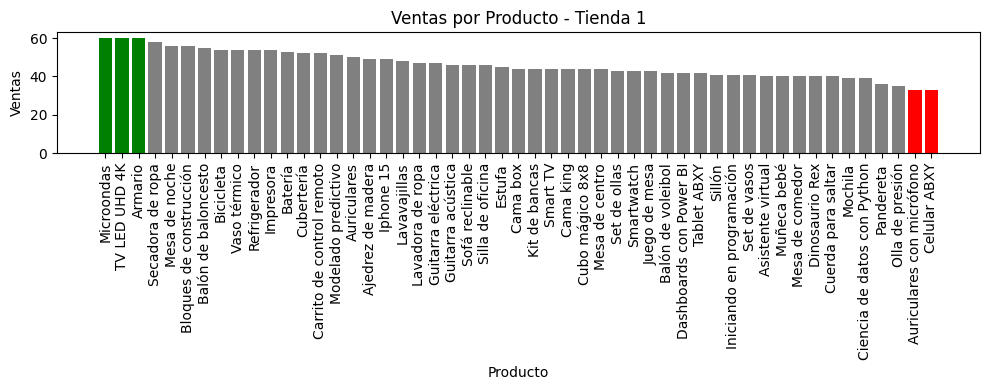

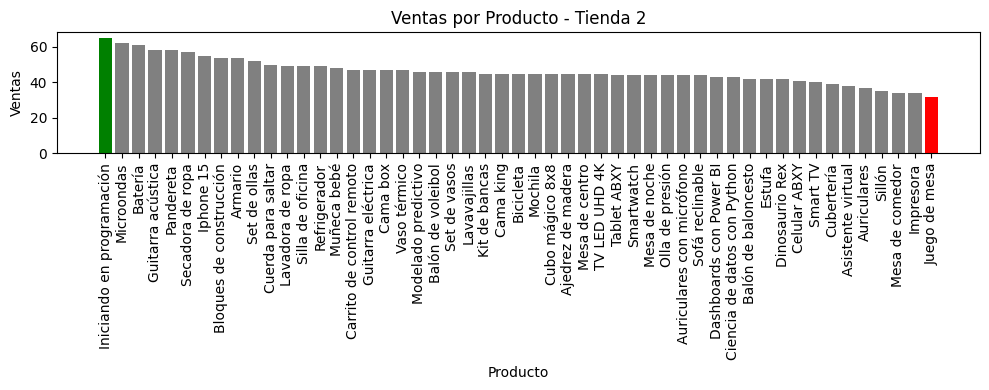

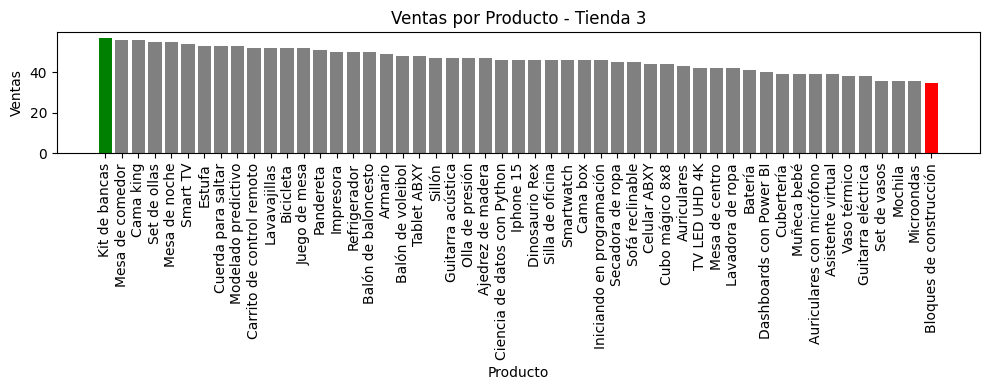

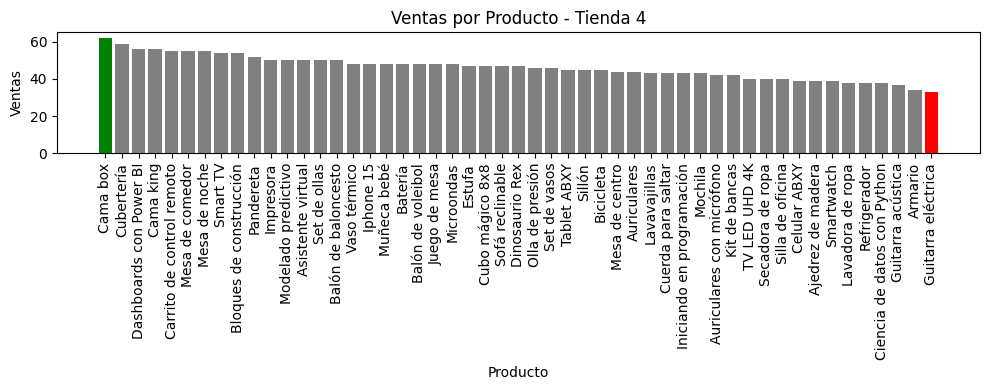

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Configuración inicial
tiendas = [tienda, tienda2, tienda3, tienda4]
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
resultados = {}

# Análisis para cada tienda
for df, nombre in zip(tiendas, nombres_tiendas):
    # Conteo de ventas por producto
    ventas_por_producto = df['Producto'].value_counts().reset_index()
    ventas_por_producto.columns = ['Producto', 'Ventas']

    # Ordenar por ventas
    ventas_por_producto = ventas_por_producto.sort_values('Ventas', ascending=False)

    # Obtener top y peor producto
    top_producto = ventas_por_producto.head(1)
    peor_producto = ventas_por_producto.tail(1)

    # Almacenar resultados
    resultados[nombre] = {
        'top': top_producto.to_dict('records')[0],
        'peor': peor_producto.to_dict('records')[0],
        'todos': ventas_por_producto
    }

    # Mostrar resumen en consola
    print(f"\n{nombre}:")
    print(f"Producto más vendido: {top_producto['Producto'].values[0]} ({top_producto['Ventas'].values[0]} ventas)")
    print(f"Producto menos vendido: {peor_producto['Producto'].values[0]} ({peor_producto['Ventas'].values[0]} ventas)")

# Visualización comparativa
plt.figure(figsize=(14, 8))

# Gráfico de los más vendidos
plt.subplot(2, 1, 1)
top_data = {nombre: data['top']['Ventas'] for nombre, data in resultados.items()}
plt.bar(top_data.keys(), top_data.values(), color='green')
plt.title('Productos Más Vendidos por Tienda')
plt.ylabel('Cantidad de Ventas')
for nombre, data in resultados.items():
    plt.text(nombre, data['top']['Ventas']+0.5,
             f"{data['top']['Producto']}\n{data['top']['Ventas']}",
             ha='center', va='bottom')

# Gráfico de los menos vendidos
plt.subplot(2, 1, 2)
peor_data = {nombre: data['peor']['Ventas'] for nombre, data in resultados.items()}
plt.bar(peor_data.keys(), peor_data.values(), color='red')
plt.title('Productos Menos Vendidos por Tienda')
plt.ylabel('Cantidad de Ventas')
for nombre, data in resultados.items():
    plt.text(nombre, data['peor']['Ventas']+0.5,
             f"{data['peor']['Producto']}\n{data['peor']['Ventas']}",
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Visualización detallada por tienda
for nombre in nombres_tiendas:
    data = resultados[nombre]['todos']
    plt.figure(figsize=(10, 4))
    colors = ['green' if x == data['Ventas'].max() else
              'red' if x == data['Ventas'].min() else
              'gray' for x in data['Ventas']]
    plt.bar(data['Producto'], data['Ventas'], color=colors)
    plt.title(f'Ventas por Producto - {nombre}')
    plt.xlabel('Producto')
    plt.ylabel('Ventas')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# 5. Envío promedio por tienda

Tienda 1: $26018.61
Tienda 2: $25216.24
Tienda 3: $24805.68
Tienda 4: $23459.46


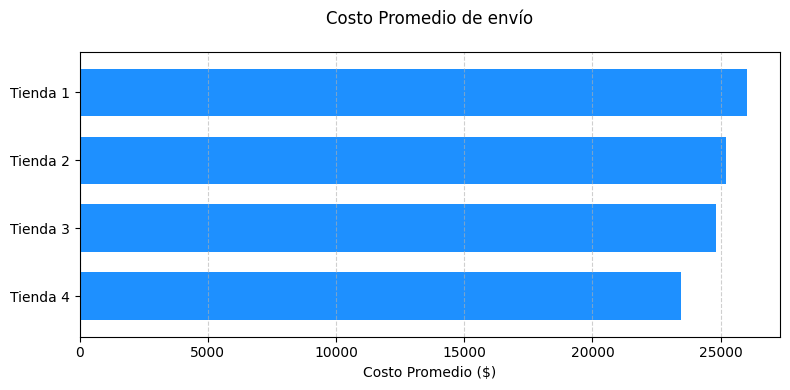

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Configuración inicial
tiendas = {'Tienda 1': tienda, 'Tienda 2': tienda2, 'Tienda 3': tienda3, 'Tienda 4': tienda4}
resultados = {}

# 2. Cálculo de promedios
for nombre, df in tiendas.items():
    if 'Costo de envío' in df.columns:
        costo_promedio = round(df['Costo de envío'].mean(), 2)
        resultados[nombre] = costo_promedio
        print(f"{nombre}: ${costo_promedio}")
    else:
        print(f"{nombre}: No tiene datos de envío")

# 3. Visualización minimalista
if resultados:
    plt.figure(figsize=(8, 4))

    # Gráfico de barras horizontales
    pd.Series(resultados).sort_values().plot(
        kind='barh',
        color='dodgerblue',
        width=0.7
    )

    # Diseño limpio
    plt.title('Costo Promedio de envío', pad=20)
    plt.xlabel('Costo Promedio ($)')
    plt.ylabel('')
    plt.grid(axis='x', linestyle='--', alpha=0.6)


    plt.tight_layout()
    plt.show()

# *Informe Final: Recomendación de Tienda para Vender*

Informe Final: Recomendación de Tienda para Vender
1. Introducción
Este informe tiene como objetivo determinar qué tienda es la más conveniente para vender, considerando múltiples factores clave:
💵 Ingresos totales (volumen de ventas)
📊 Categorías y productos más vendidos (demanda)
📋 Calificaciones de clientes (satisfacción)
💸 Costos de envío (logística)

  El análisis se basa en datos de cuatro tiendas (Tienda 1, Tienda 2, Tienda 3 y Tienda 4), evaluando su desempeño para tomar una decisión fundamentada.

2. Análisis Comparativo
  2.1. Ingresos Totales por Tienda
  Tienda 1 lidera en ventas totales, seguida de Tienda 2.

  Tienda 4 tiene el menor volumen de transacciones.

  2.2. Categorías y Productos Más Vendidos
  Tienda 1: Mayor demanda en la categoría "muebles", pero dos de los tres
  productos más comprados corresponden a la categoría "electrónicos".

  Tienda 2: Mayor demanda en la categoría "muebles", pero el producto más comprado correspondena la categoría "libros"

  Tienda 3: Mayor demanda en la categoría "muebles". El producto más comprado es "kit de bancas".

  Tienda 4: Mayor demanda en la categoría "muebles". El producto más comprado es "Cama box".

  2.3. Satisfacción del Cliente (Calificaciones Promedio)
  Tienda 3 tiene la mejor calificación (4.05/5), indicando alta satisfacción.

  Tienda 1 tiene la peor (3.98/5).

  2.4. Costos Logísticos (Envío Promedio)
  Tienda 1 tiene el costo promedio más alto ($26018.61) por envío, lo que reduce margen de ganancia.

  Tienda 4 tiene el costo promedio más bajo (23459.46) por envío.

3. Conclusión.
    
  El análisis comparativo revela que:
  
  Tienda 1 lidera en ingresos totales, pero tiene los costos logísticos más altos y la peor calificación de satisfacción (3.98/5), lo que podría afectar su rentabilidad y fidelización de clientes.
  Tienda 2 ocupa el segundo lugar en ventas, con una demanda variada (muebles y libros), pero no destaca significativamente en costos o satisfacción.
  Tienda 3 tiene la mejor calificación de satisfacción (4.05/5), lo que indica mayor fidelidad del cliente, aunque no se especifica su posición en ingresos totales.
  Tienda 4 tiene el menor volumen de ventas, pero los costos logísticos más bajos, lo que podría mejorar su margen de ganancia si se optimizan las ventas
  Tienda recomendada para vender: Tienda 4.
  
  Justificación de la decisión:
  
  📉 Rendimiento financiero más bajo:
  Tiene el menor volumen de transacciones (punto 2.1).
  Aunque tiene costos logísticos bajos ($23,459.46), esto no compensa su bajo volumen de ventas.
  
  🛒 Perfil de productos menos estratégico:Su producto más vendido ("Cama box") pertenece a la categoría "muebles", igual que las demás tiendas, sin diferenciación competitiva.
  No muestra diversificación en categorías como sí ocurre con Tienda 1 y 2 (que tienen productos destacados en electrónicos y libros).
  
  👎 No destaca en satisfacción del cliente:
  No aparece mencionada entre las mejores en calificaciones (Tienda 3 lidera con 4.05/5).
  
  ✅ Comparación con las otras opciones:
  
  Tienda 1: Aunque tiene altos costos logísticos, es la líder en ventas totales y tiene productos electrónicos entre sus más vendidos (categoría generalmente con mejores márgenes).
  
  Tienda 2: Segundo lugar en ventas y con diversificación hacia libros (puede atraer diferente segmento de clientes).
  
  Tienda 3: Mejor calificación de clientes, lo que indica buena reputación y potencial de fidelización.